In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.db import get_all_data
from bitcoin.validation import test_model
import numpy as np

df = test_model()

2018-03-24 20:43:42,176 root         INFO     Load data from SQL.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2018-03-24 20:43:42,381 root         INFO     Train Scaler Model
2018-03-24 20:43:42,394 root         INFO     Load data from SQL.
2018-03-24 20:43:42,614 root         INFO     Test set of 7827 items !


In [24]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error

print("evs: %f" % explained_variance_score(df['real'], df['predicted']))
print("mae: %f" % mean_absolute_error(df['real'], df['predicted']))
print("msr: %f" % mean_squared_error(df['real'], df['predicted']))
print("mdae: %f" % median_absolute_error(df['real'], df['predicted']))

regul = df['diff'].median()
df['predicted_regul'] = df['predicted'] + regul
df['diff_regul'] = df['real'] - (df['predicted'] + regul)
print(df.describe())


print("evs: %f" % explained_variance_score(df['real'], df['predicted_regul']))
print("mae: %f" % mean_absolute_error(df['real'], df['predicted_regul']))
print("msr: %f" % mean_squared_error(df['real'], df['predicted_regul']))
print("mdae: %f" % median_absolute_error(df['real'], df['predicted_regul']))



evs: 0.997939
mae: 13.352068
msr: 241.238978
mdae: 11.620000
              real    predicted         diff  predicted_regul   diff_regul
count  7827.000000  7827.000000  7827.000000      7827.000000  7827.000000
mean   7066.246426  7053.954371    12.292056      7065.314371     0.932056
std     209.162642   203.485270     9.495044       203.485270     9.495044
min    6600.990000  6598.330000   -62.890000      6609.690000   -74.250000
25%    6886.945000  6879.615000     7.160000      6890.975000    -4.200000
50%    7040.000000  7029.240000    11.360000      7040.600000     0.000000
75%    7241.360000  7224.720000    17.850000      7236.080000     6.490000
max    7477.500000  7451.300000    90.890000      7462.660000    79.530000
evs: 0.997939
mae: 6.773505
msr: 91.013072
mdae: 5.100000


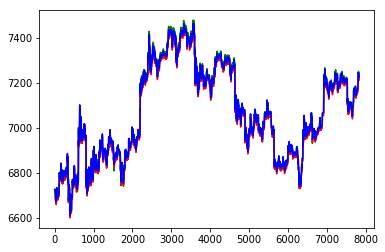

In [25]:
plt.plot(df['real'], color='g')
plt.plot(df['predicted'], 'r')
plt.plot(df['predicted_regul'], 'b')